# Inflow_Nino3.4_assignment

### Import modules containing library functions and Read data from the file and put the numbers into an array

In [171]:
import numpy as np
import matplotlib.pyplot as plt

hist_seasonal_time_series = np.genfromtxt('assignment1_data.txt')
print('hist_seasonal_time_series = \n{}\n\n hist_seasonal_time_series shape = ' \
      ' {}'.format(hist_seasonal_time_series, hist_seasonal_time_series.shape))

hist_seasonal_time_series = 
[[1.969000e+03 1.000000e+00 1.503400e+02 1.024814e+00]
 [1.969000e+03 2.000000e+00 1.265500e+02 1.014148e+00]
 [1.969000e+03 3.000000e+00 8.081000e+01 9.060549e-01]
 ...
 [2.006000e+03 1.000000e+01 5.256300e+02 8.805061e-01]
 [2.006000e+03 1.100000e+01 7.859500e+02 1.141943e+00]
 [2.006000e+03 1.200000e+01 8.597400e+02 1.085966e+00]]

 hist_seasonal_time_series shape =  (456, 4)


### Function that extracts and returns reservoir inflow data and the Nino3.4 anomaly in March for all the years in the dataset

In [172]:
def extract_reservoir_inflow_data(hist_seasonal_time_series, month_number):
    tempList = []
    for i in hist_seasonal_time_series:
        if month_number == int(i[1]):
            tempList.append(i)   
    return(np.array(tempList))

mar_month_number = 3
extracted_reservoir_inflow_data = extract_reservoir_inflow_data(hist_seasonal_time_series, mar_month_number)
print('extracted_reservoir_inflow_data = \n{}\n\n extracted_reservoir_inflow_data shape =' \
      '{}'.format(extracted_reservoir_inflow_data, extracted_reservoir_inflow_data.shape))

extracted_reservoir_inflow_data = 
[[ 1.969000e+03  3.000000e+00  8.081000e+01  9.060549e-01]
 [ 1.970000e+03  3.000000e+00  1.277100e+02  2.045352e-01]
 [ 1.971000e+03  3.000000e+00  1.916000e+02 -1.191065e+00]
 [ 1.972000e+03  3.000000e+00  1.987000e+02 -8.331813e-03]
 [ 1.973000e+03  3.000000e+00  1.411300e+02  5.104423e-01]
 [ 1.974000e+03  3.000000e+00  1.708800e+02 -1.249638e+00]
 [ 1.975000e+03  3.000000e+00  2.741000e+02 -7.281188e-01]
 [ 1.976000e+03  3.000000e+00  1.260600e+02 -8.687185e-01]
 [ 1.977000e+03  3.000000e+00  1.975700e+02  2.334286e-01]
 [ 1.978000e+03  3.000000e+00  7.610000e+01 -1.453153e-02]
 [ 1.979000e+03  3.000000e+00  1.225900e+02  1.124421e-01]
 [ 1.980000e+03  3.000000e+00  2.001500e+02  2.227347e-01]
 [ 1.981000e+03  3.000000e+00  9.895000e+01 -4.111581e-01]
 [ 1.982000e+03  3.000000e+00  1.525300e+02  1.739747e-01]
 [ 1.983000e+03  3.000000e+00  7.222000e+01  1.573295e+00]
 [ 1.984000e+03  3.000000e+00  1.270200e+02 -2.331850e-01]
 [ 1.985000e+03  3.00

### Print scatter plot

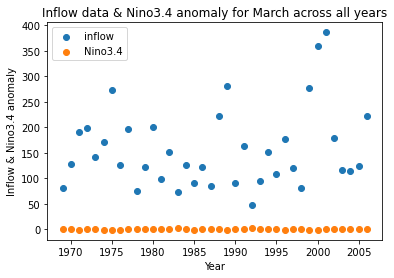

In [173]:
inflow_data = list(extracted_reservoir_inflow_data[:, 2])
nino_anomaly =  list(extracted_reservoir_inflow_data[:, 3])
years = list(extracted_reservoir_inflow_data[:, 0])

plt.figure(1)
plt.scatter(years, inflow_data, label='inflow')
plt.scatter(years, nino_anomaly, label='Nino3.4')
plt.ylabel("Inflow & Nino3.4 anomaly")
plt.xlabel("Year")
plt.legend()
plt.title("Inflow data & Nino3.4 anomaly for March across all years")
plt.show()

##### We can see in the scatter plot above that there are two outliers. But let's verify this with the code below.

###  Outlier detenction

In [174]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
data = np.array([inflow_data, nino_anomaly])
clusters = outlier_detection.fit_predict(data)

if list(clusters).count(-1) > 0:
    print('{} Outliers exist'.format(list(clusters).count(-1)))
else:
    print('No Outliers')

2 Outliers exist


### Calculate suitable statistics 

In [175]:
import statistics
from scipy.stats.mstats import gmean
from functools import reduce

def gmean(numbers):
    return(reduce(lambda x, y: x*y, numbers)**(1.0/len(numbers)))

def har_mean(x):
    hmean = len(x) / sum(1 / item for item in x)
    return(hmean)

# Print Measures of spread for inflow and Nino3.4 anomaly
print('------- *** Measures of spread and other interesting statistics about the two samples *** -------\n')

# Population standard deviation of data.
print('- Population standard deviation of data for Inflow data is {} and for Nino3.4 is ' \
      '{}\n'.format(statistics.pstdev(inflow_data), statistics.pstdev(nino_anomaly)))
# Population variance of data.
print('- Population variance of data for Inflow data is {} and for Nino3.4 is ' \
      '{}\n'.format(statistics.pvariance(inflow_data), statistics.pvariance(nino_anomaly)))
# Sample standard deviation of data.
print('- Sample standard deviation of data for Inflow data is {} and for Nino3.4 is ' \
      '{}\n'.format(statistics.stdev(inflow_data), statistics.stdev(nino_anomaly)))
# Sample variance of data.
print('- Sample variance of data for Inflow data is {} and for Nino3.4 is ' \
      '{}\n'.format(statistics.variance(inflow_data), statistics.variance(nino_anomaly)))
# Arithmetic mean (“average”) of data.
print('- Arithmetic mean of data for Inflow data is {} and for Nino3.4 is ' \
      ' {}\n'.format(statistics.mean(inflow_data), statistics.mean(nino_anomaly)))

# Geometric mean of data.
print('- Geometric mean of Inflow data is {} and for Nino3.4 is ' \
      '{}\n'.format(gmean(inflow_data), gmean(nino_anomaly)))

# Harmonic mean of data.
print('- Harmonic mean of data for Inflow data is {} and for Nino3.4 is ' \
      ' {}\n'.format(har_mean(inflow_data), har_mean(nino_anomaly)))

# Median (middle value) of data.
print('- Median of data for Inflow data is {} and for Nino3.4 is ' \
      ' {}\n'.format(statistics.median(inflow_data), statistics.median(nino_anomaly)))

# Low median of data.
print('- Median of data for Inflow data is {} and for Nino3.4 is ' \
      ' {}\n'.format(statistics.median_low(inflow_data), statistics.median_low(nino_anomaly)))

# High median of data.
print('- High of data for Inflow data is {} and for Nino3.4 is ' \
      ' {}\n'.format(statistics.median_high(inflow_data), statistics.median_high(nino_anomaly)))

# Median, or 50th percentile, of grouped data.
print('- High of data for Inflow data is {} and for Nino3.4 is ' \
      ' {}\n'.format(statistics.median_grouped(inflow_data), statistics.median_grouped(nino_anomaly)))

------- *** Measures of spread and other interesting statistics about the two samples *** -------

- Population standard deviation of data for Inflow data is 77.09242452328769 and for Nino3.4 is 0.7281412937957433

- Population variance of data for Inflow data is 5943.241918878809 and for Nino3.4 is 0.5301897437305391

- Sample standard deviation of data for Inflow data is 78.12726847169627 and for Nino3.4 is 0.7379154397787031

- Sample variance of data for Inflow data is 6103.870078848507 and for Nino3.4 is 0.5445191962637969

- Arithmetic mean of data for Inflow data is 157.11144736842104 and for Nino3.4 is  0.046541711447368427

- Geometric mean of Inflow data is 140.91964160629965 and for Nino3.4 is nan

- Harmonic mean of data for Inflow data is 126.93248031193174 and for Nino3.4 is  -0.075298120462773

- Median of data for Inflow data is 127.365 and for Nino3.4 is  0.14600135

- Median of data for Inflow data is 127.02 and for Nino3.4 is  0.118028

- High of data for Inflow data

/home/pfb16181/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


#### ====================================================================================================================================
#### > Use the linregress() function to develop a linear regression model for reservoir inflow in November, based on knowledge of the November Nino3.4 SST anomaly and inflow data from the years given in the dataset. 
#### > This model could be used to predict inflow next November, given a prediction of the Nino3.4 anomaly. 

In [183]:
from scipy.stats.stats import linregress
import numpy as np


extracted_reservoir_inflow_data_forAnotherMonth = extract_reservoir_inflow_data(hist_seasonal_time_series, 11)

print('extracted_reservoir_inflow_data = \n{}\n\n extracted_reservoir_inflow_data shape =' \
      '{}'.format(extracted_reservoir_inflow_data_forAnotherMonth, extracted_reservoir_inflow_data_forAnotherMonth.shape))


extracted_reservoir_inflow_data = 
[[ 1.969000e+03  1.100000e+01  7.861900e+02  7.110762e-01]
 [ 1.970000e+03  1.100000e+01  1.026270e+03 -8.988835e-01]
 [ 1.971000e+03  1.100000e+01  1.325380e+03 -9.928036e-01]
 [ 1.972000e+03  1.100000e+01  7.039800e+02  2.043383e+00]
 [ 1.973000e+03  1.100000e+01  1.027390e+03 -1.902790e+00]
 [ 1.974000e+03  1.100000e+01  1.013090e+03 -8.493769e-01]
 [ 1.975000e+03  1.100000e+01  8.967900e+02 -1.725950e+00]
 [ 1.976000e+03  1.100000e+01  5.996500e+02  7.909826e-01]
 [ 1.977000e+03  1.100000e+01  4.112000e+02  7.857430e-01]
 [ 1.978000e+03  1.100000e+01  1.223820e+03 -1.800972e-01]
 [ 1.979000e+03  1.100000e+01  6.587600e+02  4.778493e-01]
 [ 1.980000e+03  1.100000e+01  9.306000e+02  2.171713e-02]
 [ 1.981000e+03  1.100000e+01  1.127990e+03 -1.443499e-01]
 [ 1.982000e+03  1.100000e+01  5.009000e+02  2.170516e+00]
 [ 1.983000e+03  1.100000e+01  5.726600e+02 -8.924033e-01]
 [ 1.984000e+03  1.100000e+01  6.009300e+02 -9.521771e-01]
 [ 1.985000e+03  1.10

In [211]:
X = extracted_reservoir_inflow_data_forAnotherMonth[:, 3]  
Y = extracted_reservoir_inflow_data_forAnotherMonth[:, 2]

linearmodel = linregress(X,Y)
print('Results of linear model metrics = {}\n'.format(linearmodel))

b0 = linearmodel[0]
b1 = linearmodel[1]

# Make predictions
# use the slope and intercept values to return a new value to represent where on the 
# y-axis the corresponding x value will be placed
def func(X):
    return(b0 * X + b1 )

predictions = func(X)
# print('predictions = \n{}'.format(predictions))

for idx, i in enumerate(X):
    if idx == 0:
        print('Nino3.4','\t', 'Inflow Actual', '\t', 'Inflow Predictions', '\t', 'errors', '\t', 'sq_errors')
        print('--------------------------------------------------------------------------------------------')
    
    print(i,'\t', Y[idx], '\t', predictions[idx], '\t', Y[idx]-predictions[idx],  '\t',  (Y[idx]-predictions[idx])**2) 

# run each value X via the function - result is a new array with new values for y-axis
model = list(map(func, X))

Results of linear model metrics = LinregressResult(slope=-169.89619153897067, intercept=870.7403436162813, rvalue=-0.6227487256028322, pvalue=2.977122184772769e-05, stderr=35.576280607819676)

Nino3.4 	 Inflow Actual 	 Inflow Predictions 	 errors 	 sq_errors
--------------------------------------------------------------------------------------------
0.7110762 	 786.19 	 749.9312053422778 	 36.258794657722206 	 1314.7001900308644
-0.8988835 	 1026.27 	 1023.4572269035016 	 2.812773096498404 	 7.911692492385219
-0.9928036 	 1325.38 	 1039.4138942024608 	 285.9661057975393 	 81776.61366500943
2.043383 	 703.98 	 523.5773540608047 	 180.40264593919528 	 32545.11466186265
-1.90279 	 1027.39 	 1194.0171179147192 	 -166.62711791471907 	 27764.59642456569
-0.8493769 	 1013.09 	 1015.0462441074584 	 -1.9562441074583603 	 3.826891007965557
-1.72595 	 896.79 	 1163.9726754029678 	 -267.1826754029678 	 71386.58203548765
0.7909826 	 599.65 	 736.3554123026883 	 -136.70541230268827 	 18688.369752847

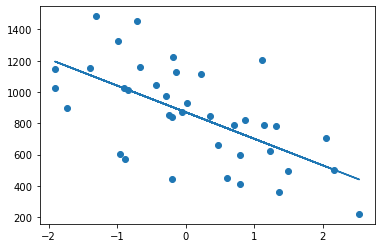

In [185]:
plt.scatter(X, Y)
plt.plot(X, model)
plt.show()

### The blue line is the line of linear regression.

### Plot with predictions 

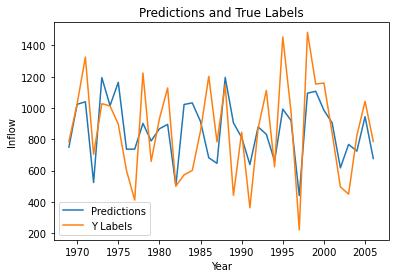

In [204]:
plt.figure(2)
plt.plot(years, predictions,  label='Predictions')
plt.plot(years, Y,  label='Y Labels')
plt.ylabel("Inflow")
plt.xlabel("Year")
plt.title("Predictions and True Labels")
plt.legend()
plt.show()

#### Accuracy of my predictions of inflow using the regression model